
 <img src=".\figures\Title.png">

### Outline
* Review the big picture of GSFLOW model develpments
* Explore HRU shapefile using Geopandas to read/write shapefiles
* Exercise: Saghen Groundwater Model Development
* Steady-State model vs. Transient 
* Model input and output archiving in HRU shapefile







### Background
At this stage, we have built the input files for the PRMS model using GSFLOW-arcpy. One of the files that are generated is the hru_param.shp file. This shapefile has most of the information we will need to build the MODFLOW model. 

<img src=".\figures\WorkFlow.png">



### MODFLOW PACKAGES
 <img src=".\figures\mf_packages.png">

In [12]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import flopy
import numpy as np
import pandas as pd
import datetime

### Explore HRU Shapefile Using Geopandas
Let us upload the hru_param.shp file and look at it.

In [13]:
hru_shp_file = r"../models_data/gis/hru_params.shp"
hru_shp = gpd.read_file(hru_shp_file)

In [14]:
#Let us look at the attribute table and plot some information ....
hru_shp.head(5) # list the first 5 rows


,ORIG_FID,HRU_ID,HRU_TYPE,DEM_MEAN,DEM_MIN,DEM_MAX,DEM_ADJ,DEM_FLOWAC,DEM_SUM,DEM_COUNT,...,TMN_ADJ_04,TMN_ADJ_05,TMN_ADJ_06,TMN_ADJ_07,TMN_ADJ_08,TMN_ADJ_09,TMN_ADJ_10,TMN_ADJ_11,TMN_ADJ_12,geometry
0,0,6385,0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000e+00,0.000000,...,0.355612,1.261850,2.545535,3.370015,3.748000,4.055324,3.384184,2.341920,2.220024,"POLYGON ((214109.9999999997 4366620, 214109.99..."
1,1,6386,0,2155.573934,2148.798096,2162.991943,2153.81,2153.812295,3.709343e+04,17.222222,...,0.367659,1.277152,2.564234,3.439938,3.811473,4.078986,3.400229,2.356386,2.233160,"POLYGON ((214199.9999999998 4366620.000000001,..."
2,2,6387,0,2154.183817,2148.162109,2162.430908,2155.12,2155.115054,5.653489e+07,26232.888984,...,0.379823,1.292723,2.583309,3.511511,3.876560,4.103042,3.416659,2.371191,2.246645,"POLYGON ((214289.9999999992 4366619.999999999,..."
3,3,6388,0,2156.385956,2146.514893,2169.937500,2156.32,2156.319658,3.623336e+06,1680.333338,...,0.398376,1.311506,2.603701,3.579702,3.939260,4.124991,3.430095,2.386472,2.262626,"POLYGON ((214380.0000000002 4366620, 214380 43..."
4,4,6389,0,2155.930990,2138.800049,2171.084473,2157.96,2157.961997,4.590705e+06,2127.333342,...,0.440098,1.341229,2.627692,3.629655,3.987558,4.137849,3.431220,2.402376,2.286668,"POLYGON ((214470.0000000004 4366620, 214470.00..."


In [15]:
# Two ways to access data in Geopandas
hru_shp.HRU_TYPE
hru_shp['HRU_TYPE']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6438    0
6439    0
6440    0
6441    0
6442    0
6443    0
6444    0
6445    0
6446    0
6447    0
6448    0
6449    0
6450    0
6451    0
6452    0
6453    0
6454    0
6455    0
6456    0
6457    0
6458    0
6459    0
6460    0
6461    0
6462    0
6463    0
6464    0
6465    0
6466    0
6467    0
Name: HRU_TYPE, Length: 6468, dtype: int64

Text(0.5,1,'Active Domain')

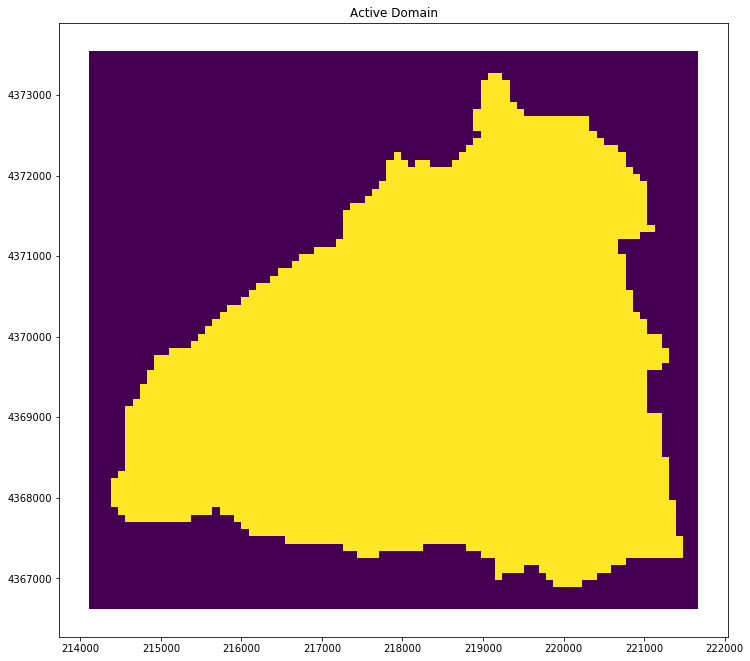

In [16]:
# We can plot any field in the attribute table
hru_shp.plot(column='HRU_TYPE',  figsize=(12, 12))
plt.title("Active Domain")

In [17]:
## access other values in hru shapefile
print(hru_shp.columns)

Index([  u'ORIG_FID',     u'HRU_ID',   u'HRU_TYPE',   u'DEM_MEAN',
          u'DEM_MIN',    u'DEM_MAX',    u'DEM_ADJ', u'DEM_FLOWAC',
          u'DEM_SUM',  u'DEM_COUNT',
       ...
       u'TMN_ADJ_04', u'TMN_ADJ_05', u'TMN_ADJ_06', u'TMN_ADJ_07',
       u'TMN_ADJ_08', u'TMN_ADJ_09', u'TMN_ADJ_10', u'TMN_ADJ_11',
       u'TMN_ADJ_12',   u'geometry'],
      dtype='object', length=149)


In [18]:
# sort attribute table data so that the HRU_ID sorted as 1,2,3,...
hru_shp = hru_shp.sort_values(by=['HRU_ID'])
hru_shp.head(5)

,ORIG_FID,HRU_ID,HRU_TYPE,DEM_MEAN,DEM_MIN,DEM_MAX,DEM_ADJ,DEM_FLOWAC,DEM_SUM,DEM_COUNT,...,TMN_ADJ_04,TMN_ADJ_05,TMN_ADJ_06,TMN_ADJ_07,TMN_ADJ_08,TMN_ADJ_09,TMN_ADJ_10,TMN_ADJ_11,TMN_ADJ_12,geometry
6384,6384,1,0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000e+00,0.000000,...,0.521400,1.524341,3.223872,4.199890,4.843607,5.296323,4.153694,2.808717,2.798645,"POLYGON ((214109.9999999991 4373460, 214109.99..."
6385,6385,2,0,2262.516089,2258.191162,2266.902344,2263.84,2263.840296,8.049210e+03,3.555556,...,0.514311,1.513639,3.193093,4.122249,4.774373,5.239582,4.112225,2.788438,2.776880,"POLYGON ((214200.0000000008 4373460, 214200.00..."
6386,6386,3,0,2255.165554,2244.793213,2265.228027,2254.40,2254.396002,5.831371e+05,258.666668,...,0.507132,1.502837,3.162097,4.044266,4.704654,5.182617,4.070496,2.768095,2.755177,"POLYGON ((214289.9999999995 4373460, 214290.00..."
6387,6387,4,0,2240.516260,2229.566406,2252.458984,2239.07,2239.065411,1.346176e+06,601.222219,...,0.499864,1.491937,3.130886,3.965942,4.634449,5.125426,4.028506,2.747690,2.733538,"POLYGON ((214379.9999999999 4373460, 214380.00..."
6388,6388,5,0,2222.017708,2211.253662,2231.781250,2224.50,2224.504575,4.154139e+06,1867.444452,...,0.492505,1.480938,3.099459,3.887276,4.563758,5.068011,3.986255,2.727222,2.711961,"POLYGON ((214469.9999999997 4373460, 214469.99..."


### FLOPY


In [19]:
# Generate an empty flopy object. 
model_name = "saghen"   # model name
workspace = os.path.join(os.getcwd(), 'modflow')         # Work space folder
exe_file = r"..\..\bin\MODFLOW-NWT"   # The location of the executable Modflow

mf = flopy.modflow.Modflow(model_name, model_ws=workspace, exe_name=exe_file,  version='mfnwt')
print(mf)

MODFLOW 0 layer(s) 0 row(s) 0 column(s) 0 stress period(s)


### Model discretization - DIS package
* This package define the spatial and time domain of the problem,
* Discretize the domain using the grid used for HRU
 <img src=".\figures\dis.png">

In [20]:
# Define the grid -- Space descritization
n_row = hru_shp["HRU_ROW"].max()    # number of rows
n_col = hru_shp['HRU_COL'].max()    # number of cols
del_r = 90.0                        # Can you get cell size from hru_param? hru_shp.HRU_X[1] - hru_shp.HRU_X[0]?
del_c = 90.0
print(n_col, n_row)

(84, 77)


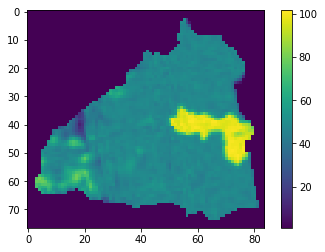

In [21]:
# The domain groundwater model is a 3D, so we need to specify the 
# Vertical discretization (number of layers and their elevations) 
nlayrs = 2                           # Number of the layers
thk1 = np.loadtxt(r"../models_data/misc/thickness1.txt")            # thickness of layer 1 
thk2 =  np.loadtxt(r"../models_data/misc/thickness2.txt")           # thickness of layer 2 

plt.imshow(thk2); plt.colorbar()


Text(0.5,1,'Bottom of layer2')

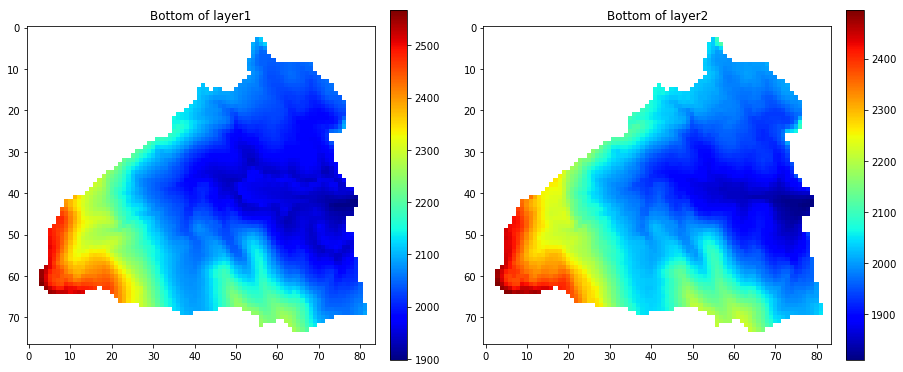

In [22]:
# Layers elevation
top_elv = hru_shp["DEM_ADJ"].values.reshape(n_row, n_col)   # Ground surface elevation


botm_elvs = np.zeros((nlayrs, n_row, n_col))                # 3D array that will hold the elevation of bottoms of each layer
botm_elvs[0,:,:] = top_elv - thk1                           # bottom of layer 1
botm_elvs[1,:,:] = botm_elvs[0,:,:] - thk2                  # bottom of layer 2

# plots
f, axs = plt.subplots(2,1,figsize=(15,15))
plt.subplot(1,2,1)
btm1 = np.ma.masked_where(thk1<2.0, botm_elvs[0,:,:])
plt.imshow( btm1, cmap = 'jet'); plt.colorbar(fraction=0.046, pad=0.04); plt.title("Bottom of layer1")
plt.subplot(1,2,2)
btm2 = np.ma.masked_where(thk1<2.0, botm_elvs[1,:,:])
plt.imshow(btm2, cmap = 'jet'); plt.colorbar(fraction=0.046, pad=0.04);  plt.title("Bottom of layer2")


### Discretization of Simulation Period
<img src = ".\figures\StressPeriod.png">

In [23]:
# Simulation period & time steps -- -- Temporal discretization
start_date = datetime.date(year = 1982,month = 8,day = 1)
end_date = datetime.date(year = 1997,month = 3,day = 31)
time_span = end_date - start_date
time_span = time_span.days
nper = 2                                            # Number of stress periods
perlen = [1.0, time_span]                           # length of each stress period
nstp =   [1.0, time_span]                           # time steps in each stress period
is_steady =[ True, False]                           # First stress period is Steady-state, the second is Transient
tim_unit = 4                                        # days
len_unit = 2                                        # meters
xul = hru_shp.total_bounds[0]                       # x coordinate of upper left corner of the grid
yul = hru_shp.total_bounds[3]                       # y coordinate of upper left corner of the grid,

# Now generate the dis object. The object holds all the information about the grid and simulation time.
dis = flopy.modflow.ModflowDis(mf, nlay=nlayrs, nrow=n_row, ncol=n_col, delr=del_r, delc=del_c,top=top_elv, botm=botm_elvs, 
                                       nper=nper, perlen=perlen, nstp=nstp, steady=is_steady,  itmuni= tim_unit, 
                                       lenuni = len_unit)  

mf

MODFLOW 2 layer(s) 77 row(s) 84 column(s) 2 stress period(s)

### Important Resources
#### Flopy Documentation
http://modflowpy.github.io/flopydoc/

#### MODFLOW online help 
https://water.usgs.gov/ogw/modflow/MODFLOW-2005-Guide/

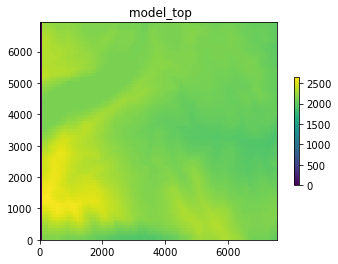

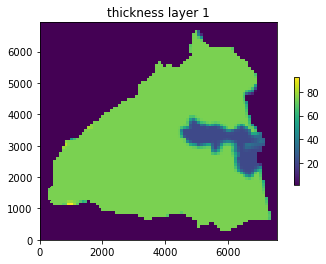

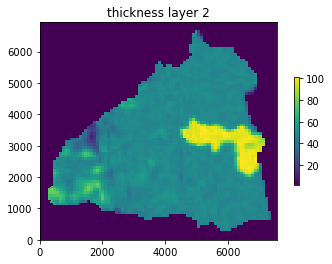

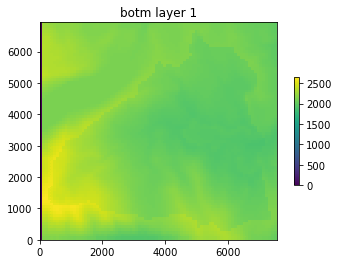

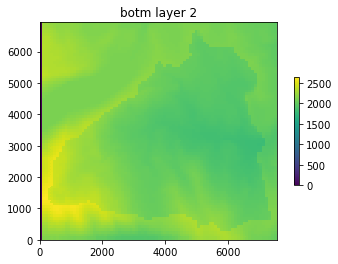

In [24]:
#dis.botm.array
#dis.check()
dis.plot()

### BAS Package
* Define active and inactive zones
    * HRU_TYPE = 0 --- Inactive
    * HRU_TYPE = 1 --- Active
    * HRU_TYPE = 2 --- Lake
    
* Define the satring head in the model

<img src=".\figures\cell_types.png">

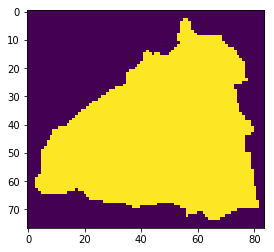

In [25]:
## Read HRU_TYPE from hru shape file and reshape it into 2D domain
ibound2d = hru_shp["HRU_TYPE"].values.reshape(n_row, n_col)

plt.imshow(ibound2d)

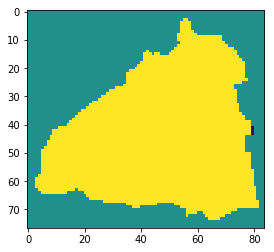

In [26]:
## Constant Head
const_head_rows = [41,42,43]
const_head_cols = [79,79,79]
ibound2d[const_head_rows, const_head_cols] = -1
plt.imshow(ibound2d)


In [27]:
## HRU shapefile has a 2D map of the inactive zones, so we need to define the active domain for the 3D groundwater domain.
ibound3d = np.zeros((nlayrs, n_row, n_col))
for lay in range(nlayrs):
    ibound3d[lay, :,:] = ibound2d
    

ibound3d.shape

(2L, 77L, 84L)

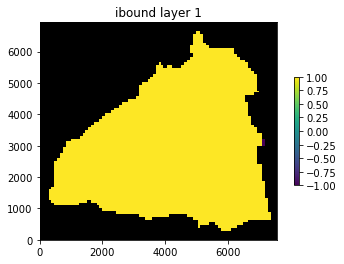

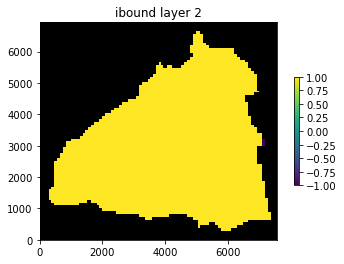

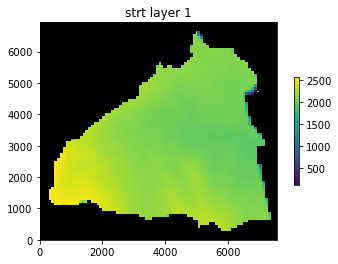

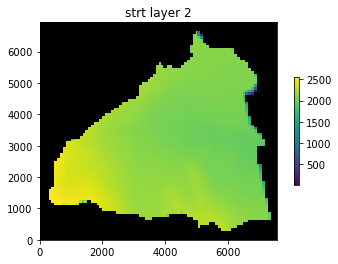

In [28]:
## initial head
initial_head = np.zeros((nlayrs, n_row, n_col)) 

strt1 = np.loadtxt(r"../models_data/misc/initial_head1.txt")
strt2 = np.loadtxt(r"../models_data/misc/initial_head2.txt")
# strt1 = mf.dis.top.array 
# strt2 =  mf.dis.top.array 
initial_head[0,:,:] = strt1
initial_head[1,:,:] = strt2

bas = flopy.modflow.ModflowBas(mf, ibound=ibound3d, strt=initial_head)
bas.plot()

In [29]:
# Check packages that are assigned so far...
mf.get_package_list()


['DIS', 'BAS6']

## Ploting the Grid ....

D:\Workspace\classes\gsflowID2447_classrepo\python_packages\flopy\flopy\plot\map.py:1412: PendingDeprecationWarning: ModelMap will be replaced by PlotMapView(); Calling PlotMapView()
  warnings.warn(err_msg, PendingDeprecationWarning)


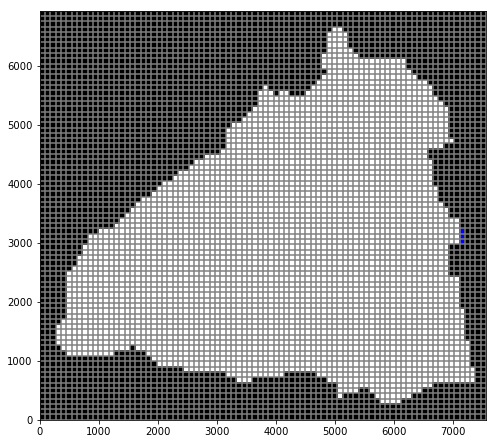

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.ModelMap(model=mf, rotation=0.0)
quadmesh = modelmap.plot_ibound()
linecollection = modelmap.plot_grid()



D:\Workspace\classes\gsflowID2447_classrepo\python_packages\flopy\flopy\plot\crosssection.py:764: PendingDeprecationWarning: ModelCrossSection will be replaced by PlotCrossSection(), Calling PlotCrossSection()
  warnings.warn(err_msg, PendingDeprecationWarning)
D:\Workspace\classes\gsflowID2447_classrepo\python_packages\flopy\flopy\plot\crosssection.py:764: PendingDeprecationWarning: ModelCrossSection will be replaced by PlotCrossSection(), Calling PlotCrossSection()
  warnings.warn(err_msg, PendingDeprecationWarning)


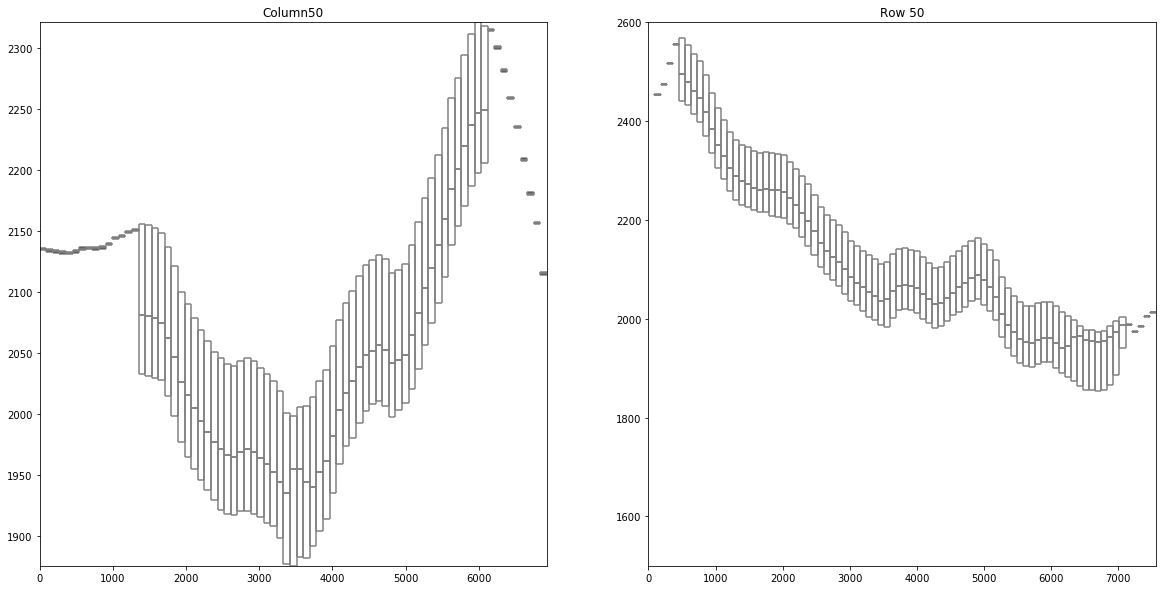

In [31]:
# cross section
fig = plt.figure(figsize=(20, 10))
col_num = 50
ax = fig.add_subplot(1, 2, 1)
modelxsect = flopy.plot.ModelCrossSection(model=mf, line={'Column': col_num})
patches = modelxsect.plot_ibound()
linecollection = modelxsect.plot_grid()
t = ax.set_title('Column{}'.format(col_num))

ax = fig.add_subplot(1, 2, 2)
row_num = 50
modelxsect = flopy.plot.ModelCrossSection(model=mf, line={'Row': row_num})
patches = modelxsect.plot_ibound()
linecollection = modelxsect.plot_grid()
plt.ylim(2600,1500)
ax.invert_yaxis()
t = ax.set_title('Row {}'.format(row_num))


###  Upstream Weighting package (UPW) 
When MODFLOW-NWT is used the UPW package must be used. For other versions of MODFLOW, the LPF package can be used. 

This package is used to define the hydraulic properties of the aquifer such as:
*  horizontal and vertical hydraulic conductivity, 
*  storage terms such as the specific storage and specfic yield.
*  Anistropy 
*  Layer type (Confined, unconfined, convertable)

In [32]:
laytyp = np.ones(nlayrs)  # convertable layer
avg_typ = 0               # 0 is harmonic mean 1 is logarithmic mean 2 is arithmetic mean 
h_anis = 1.0              # a flag or the horizontal anisotropy
layvka = 0                # 0—indicates VKA is vertical hydraulic conductivity
laywet = np.zeros(nlayrs) #contains a flag for each layer that indicates if wetting is active. 
                          #laywet should always be zero for the UPW Package 
# Hydraulic conductivity
kh = np.zeros((nlayrs, n_row, n_col))
kh[0,:,:] = np.loadtxt(r"../models_data/misc/hk1.txt")
kh[1,:,:]=np.loadtxt(r"../models_data/misc/hk2.txt")

# Specific Storage
ss = np.zeros((nlayrs, n_row, n_col))
ss[0,:,:] = np.loadtxt(r"../models_data/misc/ss1.txt")
ss[1,:,:]=np.loadtxt(r"../models_data/misc/ss2.txt")

# Specific Storage
sy = np.zeros((nlayrs, n_row, n_col))
sy[0,:,:] = np.loadtxt(r"../models_data/misc/sy1.txt")
sy[1,:,:]=np.loadtxt(r"../models_data/misc/sy1.txt")  


upw = flopy.modflow.mfupw.ModflowUpw(mf, laytyp=laytyp, layavg=avg_typ, chani=h_anis, layvka=layvka, laywet=laywet,
                                             hdry=-1e+30, iphdry=0, hk=kh, hani=1.0, vka=(kh * 0.1), ss=ss, sy=sy,
                                             vkcb=0.0, noparcheck=False, ipakcb = 55 , extension='upw')

## Can you Check UPW package? 


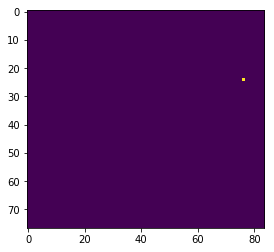

In [33]:
plt.imshow(sy[1,:,:]<=0.01)


### Streamflow-Routing (SFR2) Package
The package is used to simulate stream flow and the interaction between the groundwater aquifer and the stream network.

<img src = ".\figures\sfr1.png">

#### Structure of SFR input file

<img src = ".\figures\sfr2.png">




Text(0.5,1,'Simulated stream network')

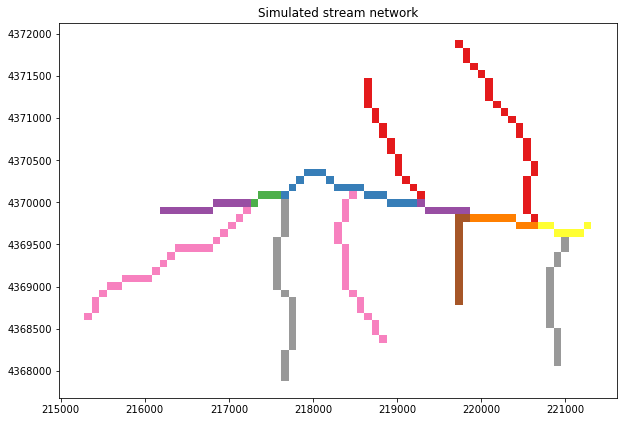

In [34]:
# The stream data can be extracted from the hru shapefile by masking out all cells that has ISEG value equel to 0.
mask = hru_shp['ISEG'] > 0
streams_data = hru_shp[mask] # a compact form is streams_data = hru_shp[hru_shp['ISEG'] > 0]
streams_data.plot(column = 'ISEG', cmap='Set1', figsize=(10, 8))
plt.title("Simulated stream network")
#streams_data

#### Reach Data
Reach Data includes information about:
* the reaches in each segments,
* their locations(layer, row, col),
* reach lengths, 
* streambed elevations and slopes,
* streambed thickness,
* streamd hydraulic conductivity,
* properties of the unsaturated zone. 

In [35]:
## Reach Data
# The reach data will be saved in a Pandas dataframe, which will make it simpler to handle the tabular data.
# Table fields name
reach_data_labels = ['node', 'k',  'i', 'j','iseg', 'ireach','rchlen', 'strtop', 'slope',
                     'strthick','strhc1', 'thts',  'thti','eps', 'uhc', 'reachID', 'outreach']
# Initialize an empty pandas dataframe
reach_data = pd.DataFrame(columns=reach_data_labels, dtype='float')

# Reach location
reach_data['k'] = streams_data['KRCH'] - 1    # layer number-- Notice that layer numbers are zero-based 
reach_data['i'] = streams_data['IRCH'] - 1    # row number
reach_data['j'] = streams_data['JRCH'] - 1    # column number
# IDs
reach_data['iseg'] = streams_data['ISEG']     # Segment ID number
reach_data['ireach'] = streams_data['IREACH'] # Reach ID number
# Stream topography
reach_data['rchlen'] = streams_data['RCHLEN']            # reach length
reach_data['strtop'] = streams_data['DEM_ADJ'] - 1.0     # Streambed elevation is assumed 1 meter below ground surface.
reach_data['slope'] = streams_data['DEM_SLP_P'] / 100.0  # Slope

# Streambed information 
reach_data['strthick'] = 0.5    # streambed thickness - meter   
reach_data['strhc1'] = 0.1      # conductivity of the stream bed

#Unsaturated Zone properties
reach_data['thts'] = 0.31      # saturated porosity
reach_data['thti'] = 0.131     # initial water content
reach_data['eps'] = 3.5        # Brooks-Corey exponent 
reach_data['uhc'] = 0.1        # conductivity of the unsaturated zone
n_reaches = len(reach_data)    # number of reaches 

# Show the first five lines in the reach data table

reach_data.head(10)


,node,k,i,j,iseg,ireach,rchlen,strtop,slope,strthick,strhc1,thts,thti,eps,uhc,reachID,outreach
4934,NaN,0,18,62,1,1,127,2086.91,0.000988,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4851,NaN,0,19,63,1,2,109,2082.10,0.000739,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4767,NaN,0,20,63,1,3,109,2078.26,0.001198,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4684,NaN,0,21,64,1,4,127,2072.01,0.001282,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4601,NaN,0,22,65,1,5,127,2060.27,0.001317,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4502,NaN,0,23,50,2,1,90,2077.91,0.002533,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4518,NaN,0,23,66,1,6,109,2052.79,0.000814,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4418,NaN,0,24,50,2,2,90,2067.64,0.002317,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4434,NaN,0,24,66,1,7,90,2049.68,0.000614,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4334,NaN,0,25,50,2,3,90,2058.54,0.001647,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN


### Segment Data:
This section provides information about each segments that is realted to:
* Method to calculte stream flow inside the stream channel,
* Define Connections of the segments with each others,
* Inflow and ouflow from each segments,
* Cross-section geolmetry.

<img src = ".\figures\sfr3.png">

In [36]:
seg_data_labels = ['nseg', 'icalc', 'outseg', 'iupseg', 'iprior',
                   'nstrpts', 'flow', 'runoff', 'etsw', 'pptsw', 'roughch', 'roughbk',
                   'cdpth', 'fdpth', 'awdth', 'bwdth', 'hcond1', 'thickm1',
                   'elevup', 'width1', 'depth1', 'hcond2', 'thickm2', 'elevdn',
                   'width2', 'depth2']

# Use the stream data from the HRU shapefile
unique_segments = streams_data.drop_duplicates(['ISEG'], keep='first')
unique_segments = unique_segments.sort_values(by='ISEG')
unique_segments


,ORIG_FID,HRU_ID,HRU_TYPE,DEM_MEAN,DEM_MIN,DEM_MAX,DEM_ADJ,DEM_FLOWAC,DEM_SUM,DEM_COUNT,...,TMN_ADJ_04,TMN_ADJ_05,TMN_ADJ_06,TMN_ADJ_07,TMN_ADJ_08,TMN_ADJ_09,TMN_ADJ_10,TMN_ADJ_11,TMN_ADJ_12,geometry
4934,4934,1575,1,2090.240186,2085.578613,2096.193604,2087.91,2087.910799,1.360722e+08,6.517144e+04,...,0.204393,1.145334,2.297033,3.289574,3.684507,3.524712,3.034971,2.239012,2.209923,"POLYGON ((219690.0000000008 4371840, 219690.00..."
4502,4502,1983,1,2083.177882,2073.278564,2094.321045,2078.91,2078.914674,1.571703e+08,7.560211e+04,...,0.170847,1.093505,2.220982,3.160205,3.602470,3.484774,2.989106,2.188183,2.163889,"POLYGON ((218610.0000000009 4371390, 218609.99..."
3325,3325,3158,1,2007.507763,2003.818970,2012.923950,2005.90,2005.902678,2.452030e+09,1.222407e+06,...,0.418218,1.067758,1.881515,2.659435,2.962885,2.736429,2.470672,1.793332,1.710746,"POLYGON ((218520.000000001 4370130, 218520.000..."
3486,3486,2983,1,2035.482087,2030.700439,2041.049927,2032.78,2032.777977,1.491825e+09,7.338850e+05,...,0.193795,1.020258,1.999191,2.940943,3.313735,3.096607,2.789593,2.005660,1.969197,"POLYGON ((217889.9999999995 4370309.999999999,..."
3228,3228,3229,1,2077.797915,2070.260498,2086.168213,2073.12,2073.120123,4.925524e+08,2.375899e+05,...,0.166549,1.048294,2.100320,3.101455,3.488583,3.300031,2.909287,2.091178,2.074304,"POLYGON ((217349.9999999999 4370040, 217350.00..."
3165,3165,3334,1,1977.558722,1975.380005,1989.319214,1976.10,1976.102996,2.584060e+09,1.307655e+06,...,0.703680,1.265690,2.045412,2.635466,2.903403,2.777361,2.401657,1.794920,1.655626,"POLYGON ((219240.0000000007 4369950, 219239.99..."
3138,3138,3307,1,2122.895351,2118.145264,2126.891846,2121.45,2121.445995,1.511495e+08,7.124833e+04,...,0.086994,1.087794,2.308781,3.300982,3.772080,3.739882,3.138894,2.299275,2.280685,"POLYGON ((216810.0000000012 4369950, 216810.00..."
3004,3004,3509,1,1966.725532,1962.229370,1973.211548,1963.92,1963.923664,3.560801e+09,1.813106e+06,...,0.736460,1.302949,2.081914,2.692703,2.958503,2.790555,2.428956,1.826444,1.663917,"POLYGON ((219870.0000000003 4369769.999999999,..."
2929,2929,3602,1,1942.769011,1940.262329,1945.098511,1942.00,1942.000128,4.195586e+09,2.160446e+06,...,0.775345,1.330680,2.092946,2.631526,2.897455,2.774947,2.406700,1.828499,1.678896,"POLYGON ((220680.0000000008 4369680, 220680 43..."
2935,2935,3608,-1,1933.362217,1929.829712,1937.661377,1930.44,1930.443712,1.770900e+09,9.173541e+05,...,0.821017,1.362218,2.115601,2.590259,2.844966,2.772174,2.351504,1.804752,1.674379,"POLYGON ((221219.9999999999 4369680, 221220.00..."


In [37]:
n_segments =  len(unique_segments)

# initialize dataframe filled with zeros
zero_data = np.zeros((n_segments, len(seg_data_labels)))
segment_data = pd.DataFrame(zero_data, columns=seg_data_labels, dtype='float')

segment_data['nseg'] = unique_segments['ISEG'].values       # Segment ID
segment_data['icalc'] = 1                                   # Use Manning's Equation for a rectangular cross-section
segment_data['outseg'] = unique_segments['OUTSEG'].values   # Downstream Segment
segment_data['iupseg'] = unique_segments['IUPSEG'].values   # segmet id for Upstream diversion or negative ID of the lake 
segment_data['width1'] = 3.0                                # Upstream width 
segment_data['width2'] = 3.0                                # Downstream width 
segment_data['roughch'] = 0.04                              # Roughness Coeffcient in Manning's Equation

segment_data

,nseg,icalc,outseg,iupseg,iprior,nstrpts,flow,runoff,etsw,pptsw,...,hcond1,thickm1,elevup,width1,depth1,hcond2,thickm2,elevdn,width2,depth2
0,1,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
1,2,1,6,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
2,3,1,6,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
3,4,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
4,5,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
5,6,1,8,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
6,7,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
7,8,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
8,9,1,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
9,10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0


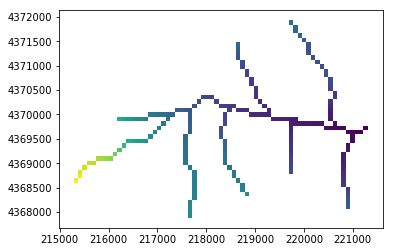

In [38]:
## Can you think of another way to compute the widths if you have no data? 
streams_data.plot(column = 'DEM_FLOWAC')
if False:    
    max_width = 20.0
    min_width = 1.0
    flow_acc_range = streams_data['DEM_FLOWAC'].max() - streams_data['DEM_FLOWAC'].min()
    widths = min_width + (max_width - min_width)* (streams_data['DEM_FLOWAC'].values - streams_data['DEM_FLOWAC'].min())/flow_acc_range

### SFR2 General Options

In [39]:
## This the options in the first line in the SFR package
nsfrpar = 0    # number of parameters 
nparseg = 0
isfropt = 3
const = 86400  # constant for manning's equation, units of ??
dleak = 0.0001 # closure tolerance for stream stage computation
ipakcb = 55    # flag for writing SFR output to cell-by-cell budget (on unit 55)
istcb2 = 81    # flag for writing SFR output to text file
nstrail = 15   # used when USZ is simulated, number of trailing wave increments
isuzn = 1      # used when USZ is simulated, number of vertical cells in unz, for icalc=1, isuzn = 1
nsfrsets = 50  # used when USZ is simulated, number of sets of trailing wave
irtflg = 0     # an integer value that flags whether transient streamflow routing is active
numtim = 2     # used when irtflg > 0, number of sub time steps to route streamflow
weight = 0.75  # used when irtflg > 0,A real number equal to the time weighting factor used to calculate the change in channel storage.

# The Segments information can be changed with time
dataset_5 = {}
for i in np.arange(nper): # we have only two stress period
    if i == 0:
        tss_par = n_segments
    else:
        tss_par = -1   # the negative sign indicates that segment data from previous time step will be used
    dataset_5[i] = [tss_par, 0, 0]

# The flopy needs reach data and segment data as numpy recarray data structure
### There is a bug in flopy here.... to avoid the error sort data
reach_data = reach_data.sort_values(by=['iseg', 'ireach'])
segment_data = segment_data.sort_values(by=['nseg'])
reach_data.head(5)

,node,k,i,j,iseg,ireach,rchlen,strtop,slope,strthick,strhc1,thts,thti,eps,uhc,reachID,outreach
4934,NaN,0,18,62,1,1,127,2086.91,0.000988,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4851,NaN,0,19,63,1,2,109,2082.10,0.000739,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4767,NaN,0,20,63,1,3,109,2078.26,0.001198,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4684,NaN,0,21,64,1,4,127,2072.01,0.001282,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN
4601,NaN,0,22,65,1,5,127,2060.27,0.001317,0.5,0.1,0.31,0.131,3.5,0.1,NaN,NaN


In [40]:
reach_data = reach_data.to_records(index=False)
segment_data = segment_data.to_records(index=False)
segment_data = {0: segment_data}
# you can change segments data for each stress period? segment_data = {0: segment_data0, 1: segment_data1 }

# channel flow data
channel_flow_data =     {}  # for 6e - flow table [flow1 flow2; depth1, depth2, width1, width2]
channel_geometry_data = {}  # 6d - complex channel cross-section

sfr = flopy.modflow.ModflowSfr2(mf, nstrm=n_reaches, nss=n_segments, const=const, nsfrpar= nsfrpar, nparseg = nparseg,
                                        dleak=dleak, ipakcb=ipakcb, nstrail = nstrail, isuzn = isuzn,  nsfrsets= nsfrsets,
                                        istcb2=istcb2, reachinput=True, isfropt = isfropt, irtflg = irtflg,
                                        reach_data=reach_data, numtim = numtim, weight = weight,
                                        segment_data=segment_data,
                                        channel_geometry_data=channel_geometry_data,
                                        channel_flow_data=channel_flow_data,
                                        dataset_5=dataset_5)
mf.get_package_list()

['DIS', 'BAS6', 'UPW', 'SFR']

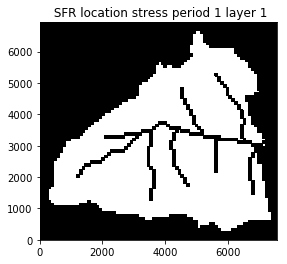

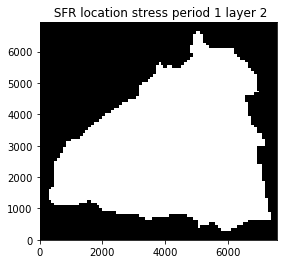

In [41]:
sfr.plot()

### Output Control Package
This is where we tell MODFLOW how to print results output. It is wise to print the results only at the time you are interseted in. 

In [42]:
# Add OC package to the MODFLOW model
options = ['PRINT HEAD', 'PRINT DRAWDOWN', 'PRINT BUDGET',
           'SAVE HEAD', 'SAVE DRAWDOWN', 'SAVE BUDGET',
         'SAVE IBOUND', 'DDREFERENCE']

# nstp =   [1.0, 5844.0]
spd = dict()  
steps_to_print = np.linspace(0,nstp[1]-1, 500).astype(int)
key = (0, 0)
spd[key] = ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET' ]  

for time_point in steps_to_print:
    key = (1,time_point)
    spd[key] = ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET' ] 

spd

{(0, 0): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 0): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 10): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 21): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 32): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 42): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 53): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 64): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 75): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 85): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 96): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 107): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 118): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 128): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 139): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 150): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 160): ['SAVE HEAD', 'PRINT BUDGET', 'SAVE BUDGET'],
 (1, 171): ['SAVE HEAD', 'PRINT BUDGET', 'SA

In [43]:
oc = flopy.modflow.ModflowOc(mf, stress_period_data=spd, cboufm='(20i5)')
mf.get_package_list()

['DIS', 'BAS6', 'UPW', 'SFR', 'OC']

### Unsaturated Zone Flow (UZF) Package
The Unsarurated Zone (USZ) plays a major role in underatanding the interaction between deep groundwater system ans surface water system. 

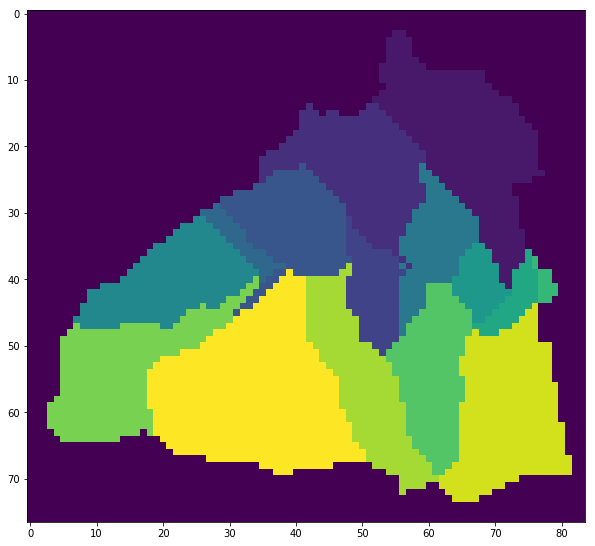

In [44]:
nuztop =  3         # Recharge to and discharge from the top model layer
iuzfopt = 1         # Vertical conductivity will specifed from upw
irunflg = 2         # >0 means water discharge will be routed to the streams.
ietflg = 0          # > 0 ET will be simulated
ipakcb = 70         # > 0 recharge, ET, and discharge will be written unformatted file
#iuzfcb2 = -132      # > 0  recharge, ET, and ground-water discharge to land surface rates to a separate unformatted file
ntrail2 = 15        # number of trailing waves
nsets = 100          # number of wave sets used to simulate multiple infiltration periods
nuzgag = 0          # equal to the number of cells (one per vertical column) that will be specified for printing
                    # detailed information on the unsaturated zone water budget and water content.
surfdep = 1.0       # The average height of undulations, D (Figure 1 in UZF documentation), in the land surface altitude

iuzfbnd = ibound2d  # used to define the aerial extent of the active model in which recharge and discharge will be simulated.
irunbnd = hru_shp['IRUNBOUND'].values.reshape(n_row, n_col)
plt.figure(figsize=(10,10))
plt.imshow(irunbnd)

In [45]:
finf = np.loadtxt(r"../models_data/misc/uzf_finf.txt")

## If you know that infiltration is a fraction (say 20%) of the annual rain, can you use information from the HRU
##  shapefile to compute finf?

# **** Answer ****
annual_rain = 0.0
for ii in np.arange(1, 13):
    #curr_ = np.copy(zmat)
    field_name = 'PPT_' + str(ii).zfill(2)
    annual_rain = annual_rain + hru_shp[field_name].values
annual_rain = 0.20 *  (annual_rain/ 365.25)/1000.0   # convert units from mm/year to m/day




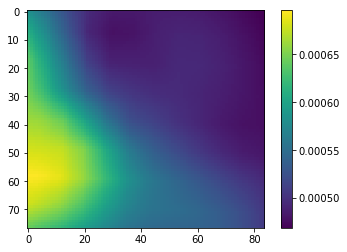

In [46]:
#uzf.plot()
plt.imshow(annual_rain.reshape(n_row, n_col)); plt.colorbar()

In [47]:
thts = np.loadtxt(r"../models_data/misc//uzf_ths.txt") # porosity of the unsaturated zone
vks = np.loadtxt(r"../models_data/misc//uzf_vks.txt") # vertical hydraulic conductivity
thetai = 0.2  # initial moisture content.

uzf = flopy.modflow.ModflowUzf1(mf, nuztop=nuztop, iuzfopt=iuzfopt, irunflg=irunflg, ietflg=ietflg,
                                ipakcb=ipakcb, iuzfcb2=0, ntrail2=ntrail2, nsets=nsets, 
                                surfdep=surfdep, iuzfbnd=iuzfbnd, irunbnd=irunbnd, vks=vks,
                                eps=4.0, thts= thts, thti=thetai, specifythtr=0, specifythti=0, nosurfleak=0,
                                finf=finf)

In [48]:
#uzf.write_file()

In [49]:
mf.get_package_list()

['DIS', 'BAS6', 'UPW', 'SFR', 'OC', 'UZF']

### NWT Solver

In [50]:
flopy.modflow.mfnwt.ModflowNwt.load(r"../models_data/misc/solver_options.nwt", mf)
if False:
    nwt = flopy.modflow.mfnwt.ModflowNwt(mf, headtol=0.01, fluxtol=500, maxiterout=1000, thickfact=1e-06, linmeth=2,
                                           iprnwt=1, ibotav=1, options='SPECIFIED', Continue=True, dbdtheta=0.4,
                                           dbdkappa=1e-05, dbdgamma=0.0, momfact=0.1, backflag=1, maxbackiter=50,
                                           backtol=1.1, backreduce=0.7, maxitinner=50, ilumethod=2, levfill=5,
                                           stoptol=1e-10, msdr=15, iacl=2, norder=1, level=5, north=7, iredsys=0,
                                           rrctols=0.0, idroptol=1, epsrn=0.0001, hclosexmd=0.0001, mxiterxmd=50,
                                           extension='nwt', unitnumber=None, filenames=None)

In [51]:
mf.get_package_list()

['DIS', 'BAS6', 'UPW', 'SFR', 'OC', 'UZF', 'NWT']

In [52]:
mf.write_input()

In [53]:
mf.run_model()

FloPy is using the following  executable to run the model: ..\..\bin\MODFLOW-NWT.exe

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.3, 8/01/2017                        
                    BASED ON MODFLOW-2005 Version 1.11.0 08/08/2013                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: saghen.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/09/11 15:06:01

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     2    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     3    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     4    Groundwater-Flow Eqn.
 Sol

(True, [])

### Learn more About Flopy !!
https://github.com/modflowpy/flopy/tree/develop/examples/Notebooks

In [54]:
!jupyter nbconvert --to script Groundwater_modeling_intro.ipynb

[NbConvertApp] Converting notebook Groundwater_modeling_intro.ipynb to script
[NbConvertApp] Writing 21717 bytes to Groundwater_modeling_intro.py
